# A Simple Model of the Fertility Transition

This model project analyzes the proposed model of the fertility transition from the article: Long-term determinants of the demographic transition, 1870-2000 by Fabrice Murtin.$^{1}$

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

# local modules
import modelproject
from modelproject import FertilityModel

## 1 Introduction
***
>*"The germs of existence contained in this spot of earth, with ample food, and ample room to expand in, would fill millions of worlds in the course of a few thousand years. Necessity, that imperious all pervading law of nature, restrains them within the prescribed bounds."*

**Thomas Malthus**: *Principle of Population*, chapter 1

 *** 


The demographic transition is the central event of economic history. Despite protestations of elasticities and technological singularity, the power of exponential growth determines with an iron law that a necessary precondition for human life and life in general to prosper, is limited fertility.

 The principle components of the demographic transition are shown in the figures below. The reduction in mortality plays a role, but it is not the interesting component, because it is natural that mortality should fall as income/capita rises. As life abhors a vacuum and expands to its limits, fertility should likewise increase in response to increased resources/capita. However, as can we seen in the figure below, during the past circa two centuries, countries representing a large majority of the world population has seen significant decreases in fertility, despite increases in income. 

This project is an attempt to model how such a change can be explained theoretically, based on the fertility model of Murtin. 





 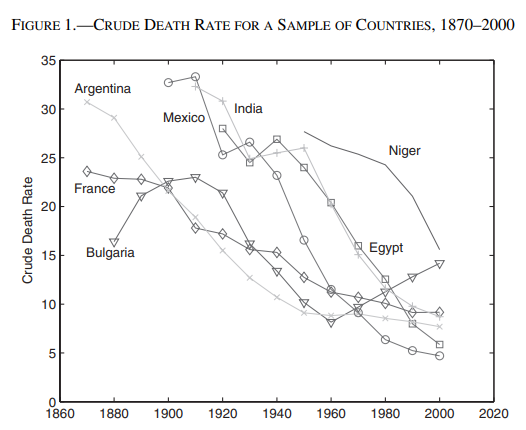 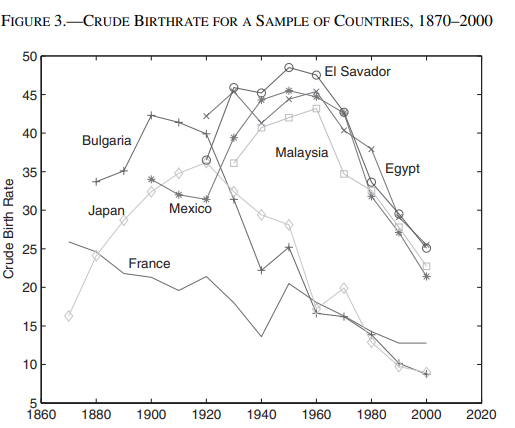

 Source: *Long-term determinants of the demographic transition, 1870-2000* by Fabrice Murtin $^{1}$

## 2 Model

As a model of fertility, the model straddles the border between economics and ecology, and describes the ecological drives and contraints of the human animal, which in some form can be generalized to mammals or even life in general. The model is based on a framework in which fertility decisions are made on the basis of a tradeoff between quantity and quality of offspring.



In the model parents care about lifetime consumption and the total bequest they leave to surviving children in the form of human capital. 

Parents choose their level of consumption, the number of children, and the educational level of their children. 

Let $c$ denote parental consumption and $y$ parental income, $s$ the surviving probability of children, $n$ the number of births, and $h$ the human capital of children.

The parents maximize utility $V$:

$$\max_{c,n,h} V = u(c) + \beta u(snh),$$ 

$$\text{s.c. } c + \phi sn + \tau esn = y,$$

$u(.)$ is the utility function, $\beta$ weighs the altruistic motive, $\phi$ is the marginal cost of raising a surviving child, and $\tau$ is the marginal cost of each year of scooling $e$ spent on surviving children.

The production function of human capital has decreasing returns,
$$h =(1 + e)^\eta,  \eta<1$$

From the first-order condition, we get 

$$\frac{∂V}{∂n}/\frac{∂V}{∂e}=\frac{1+e}{\eta n}=\frac{\phi + \tau e}{\tau n}$$ 
$$<=>$$
$$e^* = \frac{- 1}{1-\eta} + \frac{\eta}{1-\eta} \frac{\phi}{\tau}$$

This links child education $e^*$ to the cost of fertility relative to education $\frac{\phi}{\tau}$.

We make two assumptions:<a id='toc0_'></a>  

**A1.** The cost of raising children is the sum of a fixed cost and a time cost proportional to parental income, 
$$\phi(y) = \alpha + \theta y, \text{ with }\theta > 0$$

**A2.** The cost of fertility relative to education $\frac{\phi(y)}{\tau(y)}$ increases with income *y*.

Fertility is equal to the following expression obtained with a logarithmic utility function:

$$n = \frac{1-\eta}{(1+1/\beta)\theta}\frac{1}{s}\left(1+\frac{1}{\phi/\tau-1}\right)$$

showing that fertility is a decreasing function of the child and adult survival probability $s$ and cost of fertility relative to education $\phi/\tau$.
A log linearization yields:

$$\text{log }n ≈ a - \text{log}(s) - \text{log}(\phi/\tau)$$

where $a$ is a constant.

In [22]:
# dev block
"""
  A simple model of fertility transition based on income and education levels.
"""
from types import SimpleNamespace
import numpy as np
from scipy.optimize import minimize_scalar

class FertilityModel():

    def __init__(self):
        par = self.par = SimpleNamespace()

        # Utility function parameters
        par.beta = 0.95 # Altruistic motives
        par.eta = 0.5 # Decreasing returns to education
        par.alpha = 0.1 # The fixed cost of raising a child
        par.rho = 1.5 # Relative risk aversion
        par.tau = 1 # tmp value
        par.phi = 1 # tmp value
        #lambda y: 0.1*y # The marginal cost of each year of schooling
        
        par.theta = 0.1 # The time cost proportional to parental income
        par.a = 10 # A constant representing the maximum number of children over a lifetime
        par.gamma = 0.5 # Tax on having more than two children

        # Define e* after other par initialized
        par.e = -(1/(1-par.eta))+(par.eta/(1-par.eta))*(par.phi/par.tau) # value for e based on parametrization.
    
    # Update functions for varying paramaters
    def u_phi(self, y):
        par = self.par
        par.phi = par.alpha + par.theta*y
        return # return just tells the function to terminate, but the update is made in the par property.

    
    # Define the utility function with CRRA
    def u(self,c): # note to self: c is just a placeholder for whatever vakue we give it.
        
        par = self.par
        
        if par.rho == 1:
            return np.log(c)
        else:
            return (c**(1-par.rho))/(1-par.rho)
        
    def V(self,c,s,y):
        par = self.par
        snh = s*self.n(s, y)*self.h()
        return -1*(self.u(c) + par.beta*self.u(snh))


In [23]:
model = FertilityModel()
# print(model.V((1, 0.9, 100)))

In [24]:
model.par

namespace(beta=0.95,
          eta=0.5,
          alpha=0.1,
          rho=1.5,
          tau=1,
          phi=1,
          theta=0.1,
          a=10,
          gamma=0.5,
          e=-1.0)

In [9]:
model.u_phi(10)
# print(model.par)

namespace(beta=0.95, eta=0.5, alpha=0.1, rho=1.5, tau=1, phi=1.1, theta=0.1, a=10, gamma=0.5, e=-1.0)


In [16]:
model.par.rho = 1.5

In [25]:
model.u(1), model.V(1,1,1)

(-2.0, -2.0)

In [15]:
np.log(1), np.log(10)

(0.0, 2.302585092994046)

# 2. Extension of the model

In the original model, we assumed that the cost of raising children is the sum of a fixed cost and a time cost proportional to parental income, and that the relative cost of fertility relative to education increases with income. 

**The government** wants to encourage families to invest more in the education and well-being of each child rather than having more children. So the government **introduces a tax** on children after the second child.

The impact of such a tax on fertility rates and parental consumption could be analyzed using the existing model framework.

To include the tax on children after the second child, we can modify the budget constraint as follows:

$$c + \phi sn + \tau_1 es + \tau_2 es \sum_{i=3}^n i=y,$$

where $\tau_1$ is the cost of schooling for the first two children and $\tau_2$ is the additional cost of schooling for each child after the second.

The first two children still have the cost of schooling $\tau_1$, but the cost of schooling for the third child is $\tau_1 + \tau_2$, for the fourth child it is $\tau_1 + 2\tau_2$, and so on. We sum the additional cost of schooling for the third child and above using $\sum_{i=3}^n i$.

With this modification, the first-order condition becomes:

$$\frac{1+e}{\eta n}=\frac{\tau_2 es}{\tau_1}\sum_{i=3}^n i$$

which can be solved for $e$ to obtain:
​
$$e** = \frac{-1}{1-\eta} + \frac{\eta}{1-\eta}\frac{\phi s}{\tau_1 + \tau_2 s\sum_{i=3}^n i}$$

Then, using a logarithmic utility function and log-linearizing the fertility expression, we obtain:

$$log n ≈ a - log(s) - log(\frac{\phi}{\tau_1} + \tau_2 s \sum_{i=3}^n i)$$

where $a$ is a constant.

We want to use numerical optimization methods to search for the tax rate that minimizes the welfare cost subject to the constraint. Afterwards we will compare the results of different optimization methods and make a sensitivity analysis to explore the robustness of the findings to different assumptions and parameter values.

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

$^{1}$ Fabrice Murtin: 'Long-term determinants of the demographic transition, 1870-2000'. *The Review of Economics and Statistics*, May 2013, 95(2): 617-631.